<center><img src="https://upload.wikimedia.org/wikipedia/commons/b/b8/Walmart-supercentre-canada_129858013133613481.JPG" style="width: 800px;"/>

# Capstone Project - Walmart 

### Problem Statement :
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

### Project Objective

Retrieve Useful insights from the data and make prediction models to forecast the sales fX number of months/years

### Dataset Information:

|Feature | Description|
|-----------|---------|
|Store | Store number|
|Date | Week of Sales|
|Weekly_Sales | Sales for the given store in that week|
|Holiday_Flag | If it is a holiday week|
|Temperature | Temperature on the day of the sale|
|Fuel_Price | Cost of the fuel in the region|
|CPI | Consumer Price Index|
|Unemployment | Unemployment Rate|

### Data Pre_Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\amitm\Desktop\Data Science and AI\ML\Project\Walmart\Walmart DataSet\Walmart DataSet.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
#Shape of Data
df.shape

(6435, 8)

In [5]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
#Checking Null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
#Checking Duplicate values
df.duplicated().sum()

0

In [8]:
# Convert the 'Date' column to datetime format with the correct format
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")

In [9]:
# Extract Year, Month, and Week into new columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

In [10]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42


In [11]:
# Statistical analysis
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,25.818182
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.0
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,14.0
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.0
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,38.0
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.0
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,14.129201


# **Exploratory Data Analysis (EDA)**

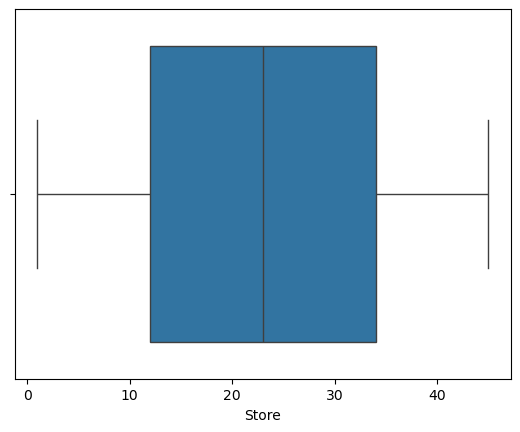

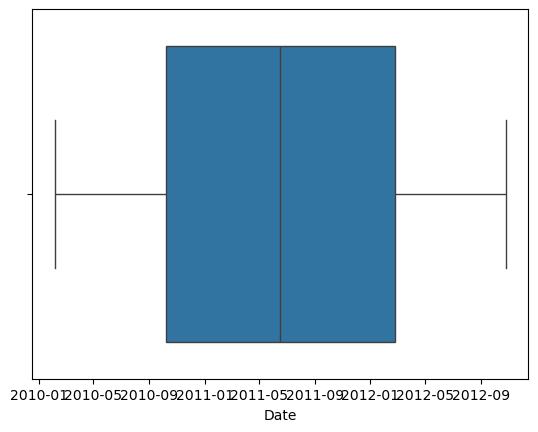

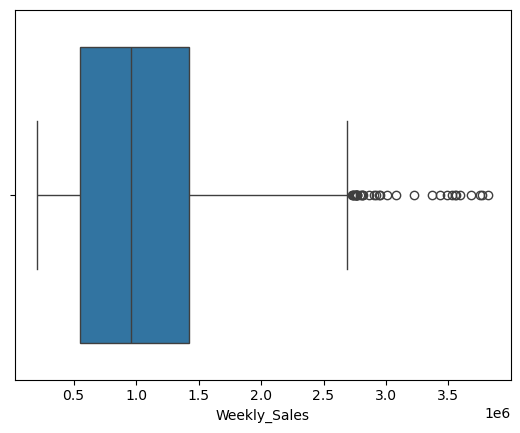

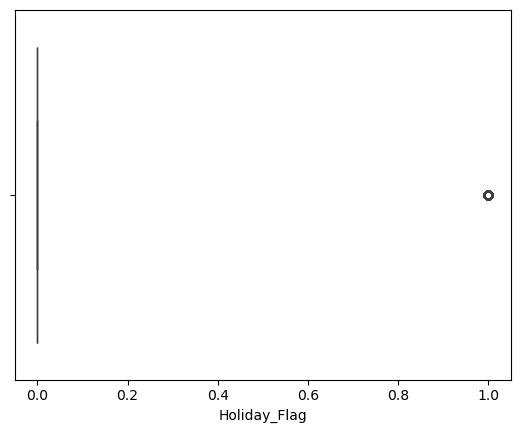

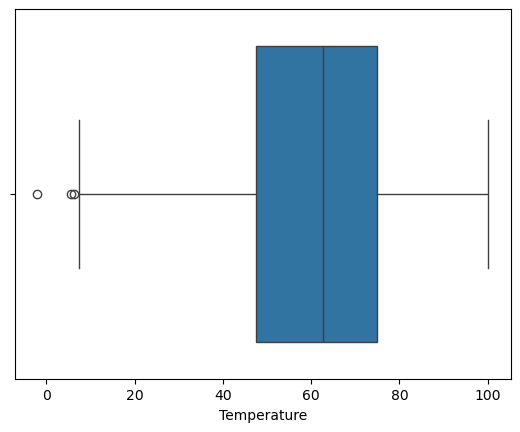

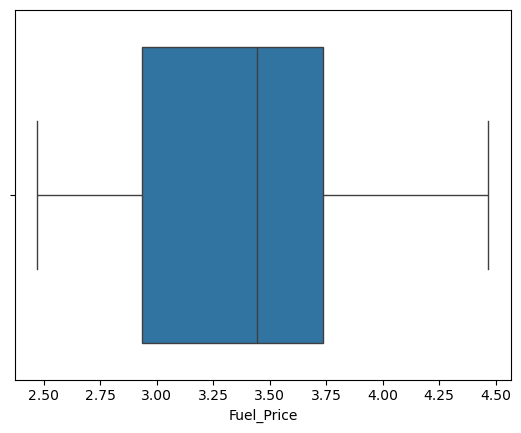

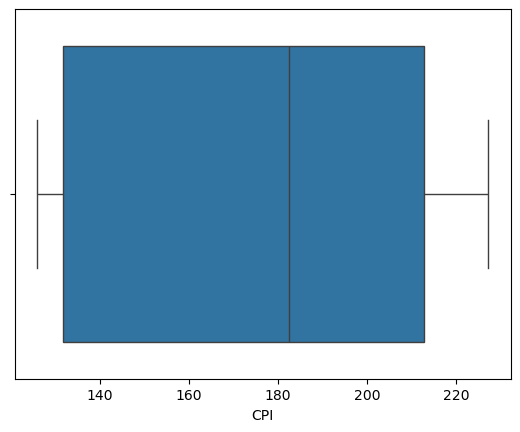

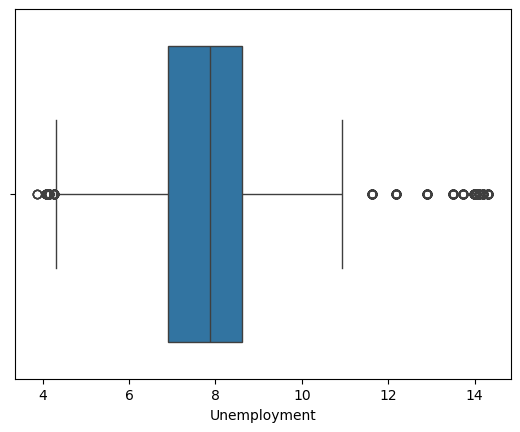

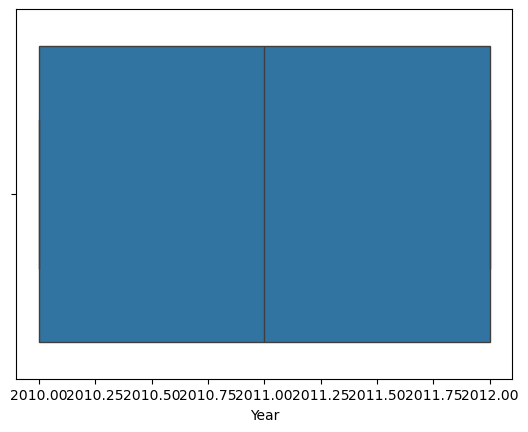

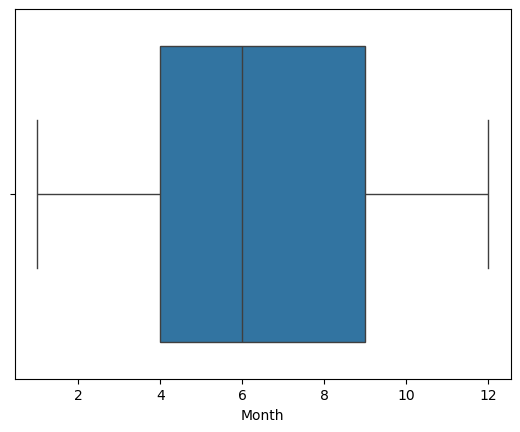

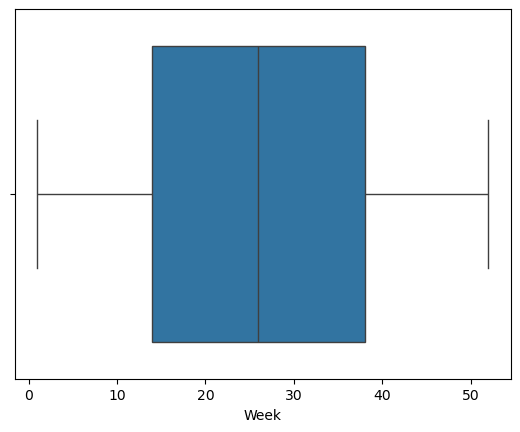

In [12]:
#Check Outlier
for col in df.columns:
    if df[col].dtype!='object':
        sns.boxplot(data=df,x=col)
        plt.show()

In [13]:
x = ['Weekly_Sales','Holiday_Flag','Unemployment']

In [14]:
#Check the oulier percentage
for col in x:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    UL=q3+1.5*IQR
    LL=q1-1.5*IQR
    l=len(df[(df[col]>UL) | (df[col]<LL)])
    total_length=len(df)
    percent=l/total_length
    print(f'{col}:-->Outlier percentage is: {percent*100}%')

Weekly_Sales:-->Outlier percentage is: 0.5283605283605284%
Holiday_Flag:-->Outlier percentage is: 6.993006993006993%
Unemployment:-->Outlier percentage is: 7.474747474747474%


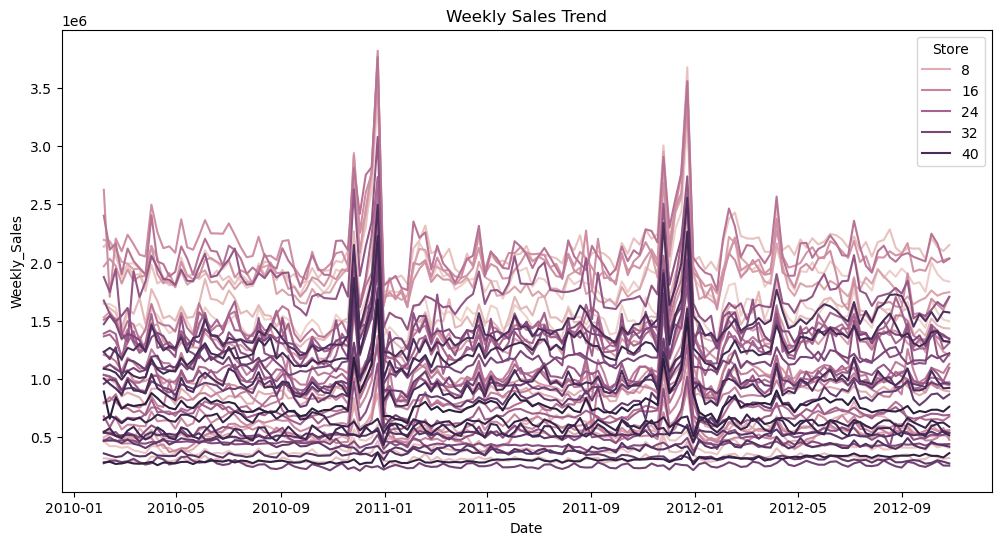

In [15]:
#Weekly Sales Trend
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Date',y='Weekly_Sales',hue='Store')
plt.title("Weekly Sales Trend")
plt.show()

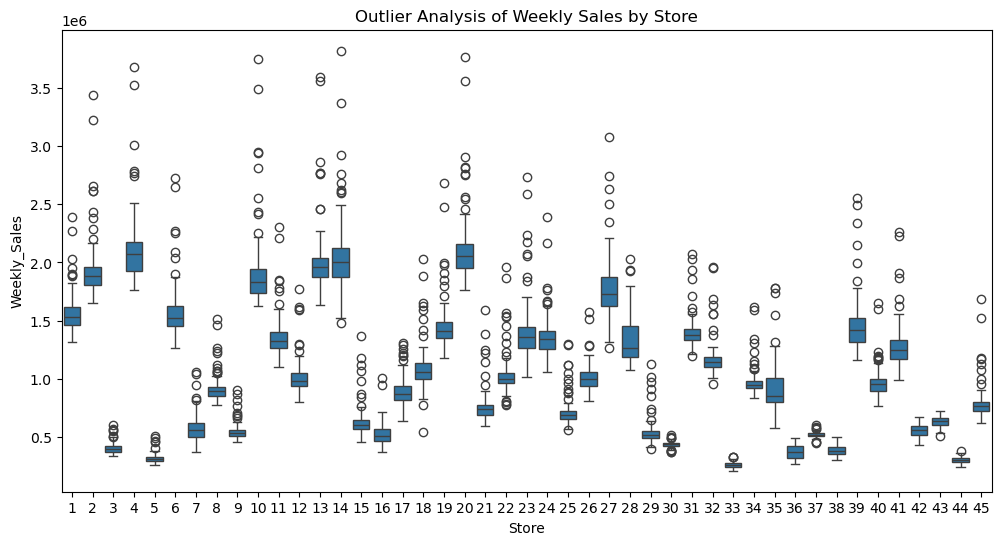

In [16]:
# Outlier Analysis of Weekly Sales by Store
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Store', y='Weekly_Sales')
plt.title('Outlier Analysis of Weekly Sales by Store')
plt.show()

## ***Analysis of Weekly Sales Affected by Unemployment Rate***

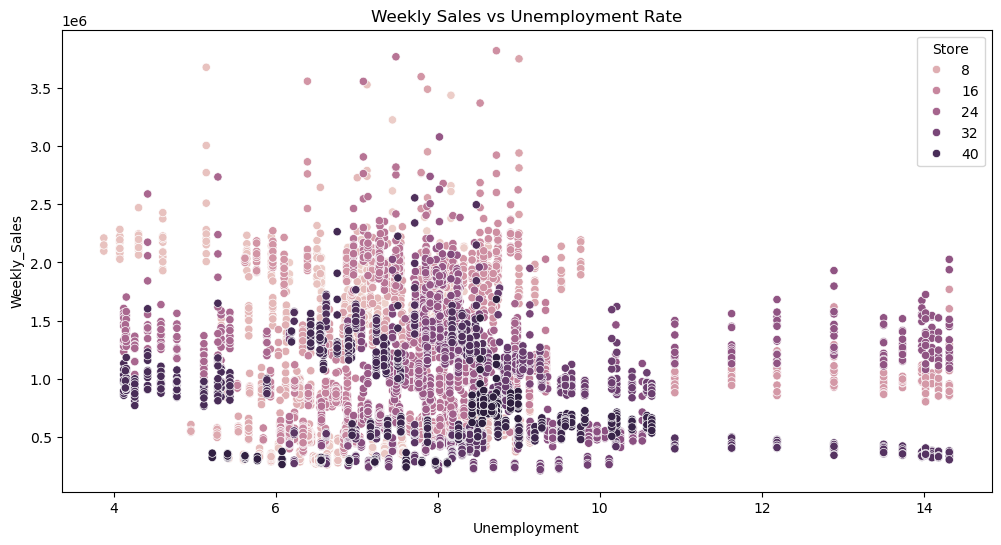

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='Unemployment',y='Weekly_Sales',hue='Store')
plt.title('Weekly Sales vs Unemployment Rate')
plt.show()

## ***Seasonal Trend Analysis***

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby(by='Month')['Weekly_Sales'].sum().reset_index()
monthly_sales

,Month,Weekly_Sales
0,1,3.325984e+08
1,2,5.687279e+08
2,3,5.927859e+08
3,4,6.468598e+08
4,5,5.571256e+08
5,6,6.226299e+08
6,7,6.500010e+08
7,8,6.130902e+08
8,9,5.787612e+08
9,10,5.847848e+08


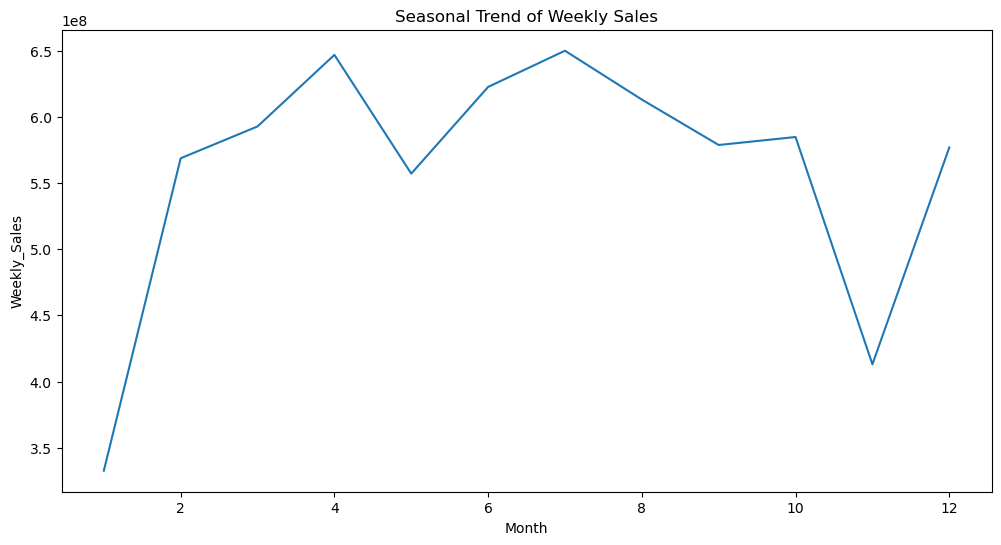

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales,x='Month',y='Weekly_Sales')
plt.title("Seasonal Trend of Weekly Sales")
plt.show()

## **Temperature Effect on Weekly Sales**

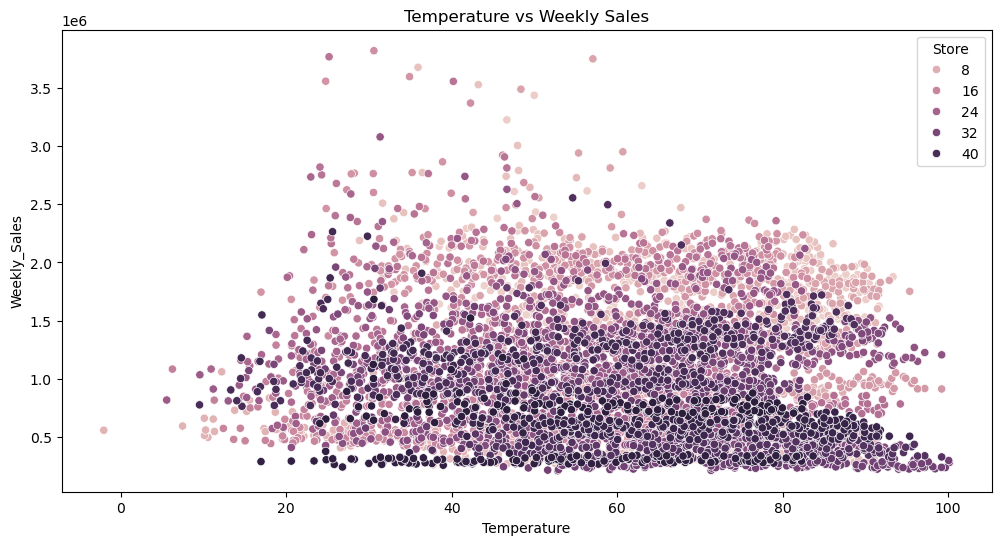

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Store')
plt.title('Temperature vs Weekly Sales')
plt.show()

## **Consumer Price Index (CPI) Effect on Weekly Sales**

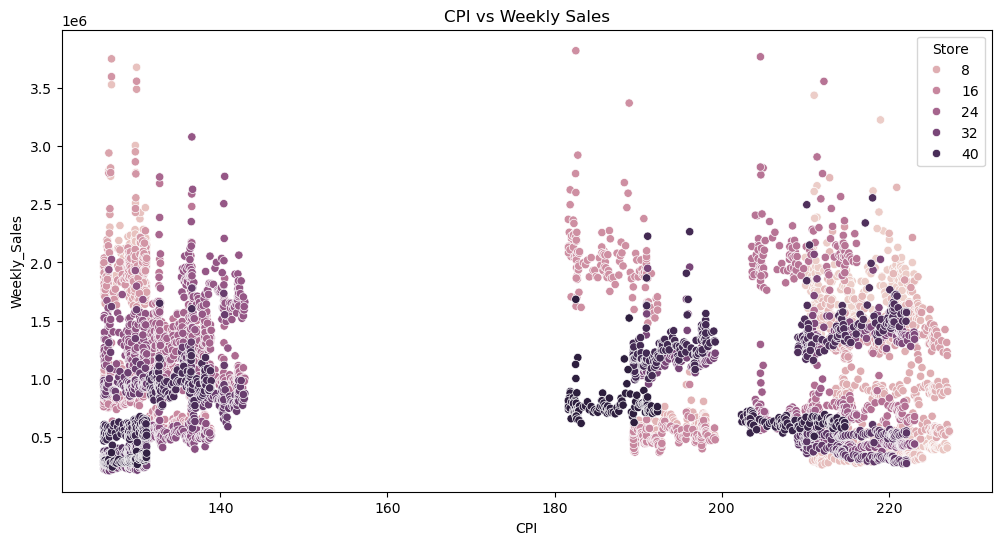

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', hue='Store')
plt.title('CPI vs Weekly Sales')
plt.show()

## **Top and Worst Performing Stores**

In [22]:
# Top Performing Stores
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index().head(10)
top_stores

,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


In [23]:
# Worst Performing Store
worst_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True).reset_index().head(1)
worst_store

,Store,Weekly_Sales
0,33,37160221.96


In [24]:
# Difference between highest and lowest performing stores
highest_sales = top_stores.iloc[0]
lowest_sales = worst_store.iloc[0]
difference = highest_sales - lowest_sales
print(f"Difference between highest and lowest performing stores: {difference}")

Difference between highest and lowest performing stores: Store                 -13.0
Weekly_Sales    264237570.5
Name: 0, dtype: float64


In [25]:
df.set_index("Month",inplace=True)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Week
Month,,,,,,,,,,
2,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
2,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,7
2,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,8
3,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,9
...,...,...,...,...,...,...,...,...,...,...
9,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,39
10,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,40
10,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,41


<Figure size 640x480 with 0 Axes>

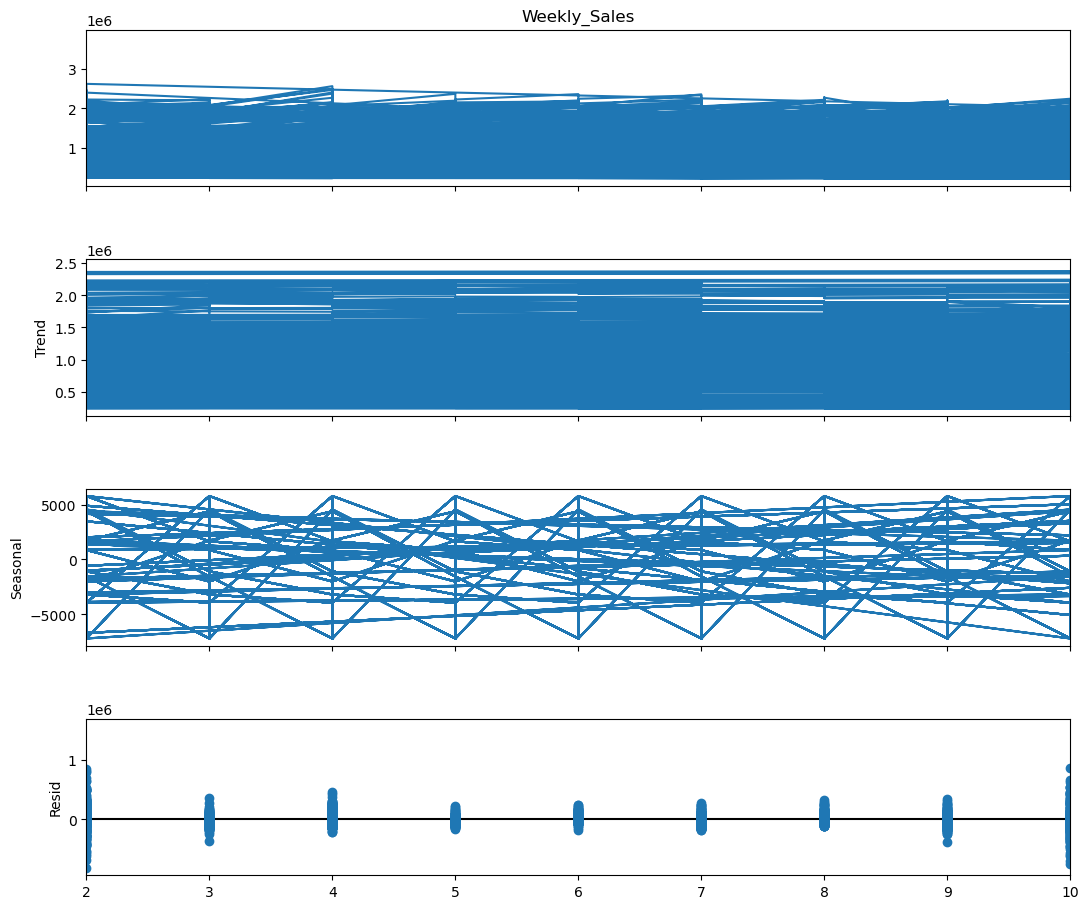

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

## **Model Building**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [28]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract features from the Date column
df['Year'] =  df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] =  df['Date'].dt.isocalendar().week

In [29]:
# Define the features and target variable
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week']
target = 'Weekly_Sales'

In [30]:
# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [33]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 13020256696.914726


In [34]:
future_dates = pd.date_range(start=df['Date'].max(), periods=12, freq='W')
future_data = []

for store in df['Store'].unique():
    for date in future_dates:
        future_data.append({
            'Store': store,
            'Holiday_Flag': 0,  # Assuming no holidays in the forecast period
            'Temperature': df[df['Store'] == store]['Temperature'].mean(),
            'Fuel_Price': df[df['Store'] == store]['Fuel_Price'].mean(),
            'CPI': df[df['Store'] == store]['CPI'].mean(),
            'Unemployment': df[df['Store'] == store]['Unemployment'].mean(),
            'Year': date.year,
            'Month': date.month,
            'Week': date.isocalendar()[1]
        })

future_data = pd.DataFrame(future_data)

In [35]:
# Make predictions for the future data
future_sales_pred = model.predict(future_data[features])

In [36]:
# Add predictions to the future_data DataFrame
future_data['Weekly_Sales_Prediction'] = future_sales_pred

In [37]:
future_data[['Store', 'Year', 'Month', 'Week', 'Weekly_Sales_Prediction']]
future_data

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Weekly_Sales_Prediction
0,1,0,68.306783,3.219699,215.996892,7.610420,2012,10,43,1.526384e+06
1,1,0,68.306783,3.219699,215.996892,7.610420,2012,11,44,1.541598e+06
2,1,0,68.306783,3.219699,215.996892,7.610420,2012,11,45,1.541132e+06
3,1,0,68.306783,3.219699,215.996892,7.610420,2012,11,46,1.567402e+06
4,1,0,68.306783,3.219699,215.996892,7.610420,2012,11,47,1.833563e+06
...,...,...,...,...,...,...,...,...,...,...
535,45,0,57.790979,3.417608,186.285678,8.648748,2012,12,50,1.013806e+06
536,45,0,57.790979,3.417608,186.285678,8.648748,2012,12,51,1.198984e+06
537,45,0,57.790979,3.417608,186.285678,8.648748,2012,12,52,1.042233e+06
538,45,0,57.790979,3.417608,186.285678,8.648748,2013,1,1,6.955768e+05


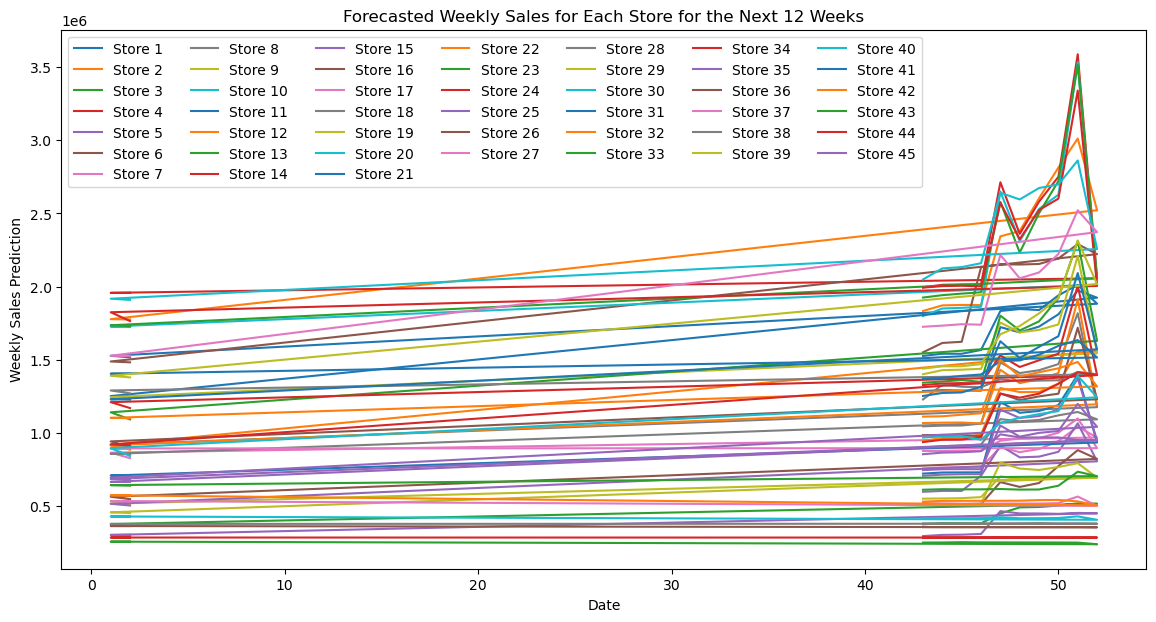

In [38]:
# Plot the forecasted sales

plt.figure(figsize=(14, 7))
for store in future_data['Store'].unique():
    store_data = future_data[future_data['Store'] == store]
    plt.plot(store_data['Week'], store_data['Weekly_Sales_Prediction'], label=f'Store {store}')

plt.xlabel('Date')
plt.ylabel('Weekly Sales Prediction')
plt.title('Forecasted Weekly Sales for Each Store for the Next 12 Weeks')
plt.legend(ncol=7)
plt.show()

# **The End**